**Tugas Besar Machine Learning**

***Clustering***

Syamsul Rizal

130118xxxx

IF-42-01

#Library

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.decomposition import PCA
from copy import deepcopy
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Eksplorasi dan Persiapan Data

## Eksplorasi Data

Untuk data Salju ini saya menggunakan 6 kolom yang saya anggap cukup penting untuk mengukur apakah besok bersalju atau tidak

In [ ]:
df_salju = pd.read_csv('drive/My Drive/TubesMalin/salju_train.csv')
df_salju = df_salju[['SuhuMin','SuhuMax','Hujan','SinarMatahari','Awan3pm','Suhu3pm']]
df_salju

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm
0,10.4,15.5,4.8,NaN,NaN,15.0
1,9.0,17.0,8.0,7.4,5.0,15.5
2,18.2,32.0,0.0,NaN,NaN,29.6
3,7.3,24.5,0.0,10.4,7.0,23.2
4,5.9,20.3,0.0,12.6,6.0,18.1
...,...,...,...,...,...,...
109090,20.1,23.7,0.0,8.9,6.0,22.1
109091,15.7,25.2,0.0,NaN,NaN,24.4
109092,7.5,20.4,1.6,NaN,NaN,19.8
109093,10.8,29.8,0.0,11.2,1.0,29.2


## Persiapan/Pre-Processing Data

**Missing Value**
> Mengisi Missing Value dari data yang ada dengan mean dan median, mean digunakan ketika skewness dari data kecil atau ada di range -1 hingga 1, sedangkan median digunakan ketika skewness besar



In [ ]:
df_salju.isnull().sum()

SuhuMin           1122
SuhuMax            929
Hujan             2431
SinarMatahari    52379
Awan3pm          44471
Suhu3pm           2698
dtype: int64

In [ ]:
df_salju.skew(axis=0, skipna=True)

SuhuMin           0.018027
SuhuMax           0.220794
Hujan            10.059372
SinarMatahari    -0.493987
Awan3pm          -0.227323
Suhu3pm           0.238056
dtype: float64

In [ ]:
#mengganti nilai null dengan mean dan median
df_salju['SuhuMin'].fillna(df_salju['SuhuMin'].mean(),inplace=True)
df_salju['SuhuMax'].fillna(df_salju['SuhuMax'].mean(),inplace=True)
df_salju['SinarMatahari'].fillna(df_salju['SinarMatahari'].mean(),inplace=True)
df_salju['Awan3pm'].fillna(df_salju['Awan3pm'].mean(),inplace=True)
df_salju['Suhu3pm'].fillna(df_salju['Suhu3pm'].mean(),inplace=True)

df_salju['Hujan'].fillna(df_salju['Hujan'].median(),inplace=True)

#mengecek kembali nilai null data 
df_salju.isnull().sum()

SuhuMin          0
SuhuMax          0
Hujan            0
SinarMatahari    0
Awan3pm          0
Suhu3pm          0
dtype: int64

In [ ]:
df_salju

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm
0,10.4,15.5,4.8,7.599527,4.51614,15.0
1,9.0,17.0,8.0,7.400000,5.00000,15.5
2,18.2,32.0,0.0,7.599527,4.51614,29.6
3,7.3,24.5,0.0,10.400000,7.00000,23.2
4,5.9,20.3,0.0,12.600000,6.00000,18.1
...,...,...,...,...,...,...
109090,20.1,23.7,0.0,8.900000,6.00000,22.1
109091,15.7,25.2,0.0,7.599527,4.51614,24.4
109092,7.5,20.4,1.6,7.599527,4.51614,19.8
109093,10.8,29.8,0.0,11.200000,1.00000,29.2


In [ ]:
df_a = df_salju['Awan3pm'].round(2)
df_a = pd.DataFrame(data = df_a, columns = ['Awan3pm'])
df_salju['Awan3pm'] = df_a

In [ ]:
df_t = df_salju['SinarMatahari'].round(2)
df_t = pd.DataFrame(data = df_t, columns = ['SinarMatahari'])
df_salju['SinarMatahari'] = df_t

In [ ]:
df_salju

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm
0,10.4,15.5,4.8,7.6,4.52,15.0
1,9.0,17.0,8.0,7.4,5.00,15.5
2,18.2,32.0,0.0,7.6,4.52,29.6
3,7.3,24.5,0.0,10.4,7.00,23.2
4,5.9,20.3,0.0,12.6,6.00,18.1
...,...,...,...,...,...,...
109090,20.1,23.7,0.0,8.9,6.00,22.1
109091,15.7,25.2,0.0,7.6,4.52,24.4
109092,7.5,20.4,1.6,7.6,4.52,19.8
109093,10.8,29.8,0.0,11.2,1.00,29.2


**Outlier**
> Menghapus Outliers atau data yang tidak stabil pada seluruh kolom yang ada, ini bertujuan untuk membuat data lebih bersih dan stabil

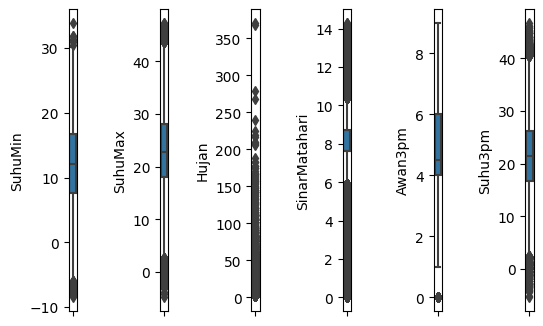

In [ ]:
#mengecek outliers menggunakan boxplot dari seaborn
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 120

sns.boxplot(y=df_salju["SuhuMin"], ax=a[0])
sns.boxplot(y=df_salju["SuhuMax"], ax=a[1])
sns.boxplot(y=df_salju["Hujan"], ax=a[2])
sns.boxplot(y=df_salju["SinarMatahari"], ax=a[3])
sns.boxplot(y=df_salju["Awan3pm"], ax=a[4])
sns.boxplot(y=df_salju["Suhu3pm"], ax=a[5])

plt.subplots_adjust(wspace=10)

In [ ]:
#fungsi untuk menghapus outlier
def out(data, kolom):
    atas = data[kolom].quantile(.75)
    bawah = data[kolom].quantile(.25)
    kuartil = atas-bawah

    batasbawah = bawah - 1.5*kuartil
    batasatas = atas + 1.5*kuartil
    
    res = data.loc[(data[kolom] > batasbawah) & (data[kolom] < batasatas)]

    return res

In [ ]:
#memanggil fungsi out dan dimasukan kembali kedalam dataframe
df_salju = out(df_salju,'Hujan')
df_salju = out(df_salju,'SinarMatahari')
df_salju = out(df_salju,'SuhuMax')
df_salju = out(df_salju,'Suhu3pm')
df_salju = out(df_salju,'SuhuMin')
df_salju = out(df_salju,'Awan3pm')

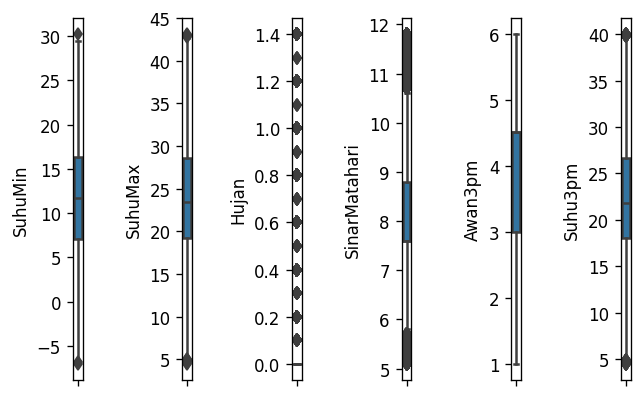

In [ ]:
#mengecek kembali outliers menggunakan boxplot dari seaborn
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 100

sns.boxplot(y=df_salju["SuhuMin"], ax=a[0])
sns.boxplot(y=df_salju["SuhuMax"], ax=a[1])
sns.boxplot(y=df_salju["Hujan"], ax=a[2])
sns.boxplot(y=df_salju["SinarMatahari"], ax=a[3])
sns.boxplot(y=df_salju["Awan3pm"], ax=a[4])
sns.boxplot(y=df_salju["Suhu3pm"], ax=a[5])

plt.subplots_adjust(wspace=10)

In [ ]:
df_salju

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm
2,18.2,32.0,0.0,7.6,4.52,29.6
6,7.7,18.7,0.2,9.7,1.00,18.3
14,6.5,17.0,0.0,7.6,4.52,16.1
15,9.3,19.3,0.0,7.0,5.00,18.4
16,10.7,24.1,0.2,7.6,4.52,23.6
...,...,...,...,...,...,...
109087,5.1,23.4,0.0,7.6,1.00,22.5
109089,18.7,23.9,0.0,7.6,1.00,22.4
109090,20.1,23.7,0.0,8.9,6.00,22.1
109091,15.7,25.2,0.0,7.6,4.52,24.4


**Scaling**
> Scaling dengan menggunakan StandardScaler, ini dipilih untuk membuat persebaran data setiap kolomnya tidak terlalu jauh dan angkanya masih bervariasi

In [ ]:
scale = StandardScaler()
scale.fit(df_salju)
temp =scale.transform(df_salju)
df_br = pd.DataFrame(temp, index=df_salju.index, columns=df_salju.columns)

In [ ]:
df_br

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm
2,1.018825,1.217570,-0.362904,-0.483745,0.455387,1.130372
6,-0.624402,-0.816859,0.416228,1.096181,-2.013777,-0.677960
14,-0.812199,-1.076898,-0.362904,-0.483745,0.455387,-1.030024
15,-0.374006,-0.725080,-0.362904,-0.935152,0.792091,-0.661957
16,-0.154909,0.009150,0.416228,-0.483745,0.455387,0.170196
...,...,...,...,...,...,...
109087,-1.031296,-0.097925,-0.362904,-0.483745,-2.013777,-0.005836
109089,1.097074,-0.021443,-0.362904,-0.483745,-2.013777,-0.021839
109090,1.316171,-0.052036,-0.362904,0.494304,1.493558,-0.069848
109091,0.627580,0.177411,-0.362904,-0.483745,0.455387,0.298219


**Export Data**
> Export data dengan format csv

In [ ]:
df_br.to_csv("drive/My Drive/TubesMalin/salju_praproses.csv") 

**Feature Selection**
> Melakukan Feature Selection dengan menggunakan PCA, ini berfungsi untuk mereduksi data menjadi 2 kolom untuk selanjutnya digunakan dalam clustering

In [ ]:
#memanggil PCA dan dimasukan kedalam dataframe agar data dapat terlihat jelas
pca = PCA(n_components=2)
df = pca.fit_transform(df_br)
df = pd.DataFrame(data = df, columns = ['x', 'y'])
df

,x,y
0,-1.754703,-1.078530
1,0.753174,2.397362
2,1.742130,-0.171045
3,1.244469,-0.871032
4,0.187231,-0.680066
...,...,...
59054,0.413417,1.366919
59055,-0.700708,0.990344
59056,-0.579595,-0.918158
59057,-0.476531,-0.760026


In [ ]:
#memasukan dataframe kedalam array untuk proses clustering
arr = np.array(list(zip(df['x'], df['y'])))
print(arr)

[[-1.75470258 -1.07852983]
 [ 0.75317379  2.39736176]
 [ 1.74212972 -0.17104509]
 ...
 [-0.57959499 -0.9181578 ]
 [-0.4765308  -0.76002629]
 [-1.82483802  2.67560473]]


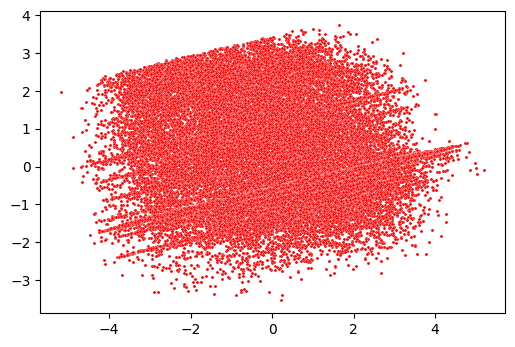

In [ ]:
#plot hasil PCA dengan scatterplot
x=arr[:,0]
y=arr[:,1]
sns.scatterplot(x, y, s=5, color='red')

# Pemodelan / Clustering

**Euclidian Distance**
> Membuat fungsi untuk menghitung jarak berdasarkan rumus Euclidian

In [ ]:
def euc(a, b, ax=1):
    kurang = a-b
    hasil = np.linalg.norm(kurang, axis=ax)
    return hasil

**Mencari Centroid**
> Mengenerate centroid secara random dengan nilai minimun dan maximun yang terdapat pada array yang menampung data salju

In [ ]:
k = 3
min = np.min(arr)
max = np.max(arr)

centro1 = np.random.randint(min, max, size=k)
centro2 = np.random.randint(min, max, size=k)
centroid = np.array(list(zip(centro1, centro2)))
print(centroid)

[[ 3  4]
 [-4  4]
 [ 4  1]]


**K Means**
> Melakukan Clustering dengan K Means 

In [ ]:
#membuat arrclus untuk menampung hasil cluster dan arrC untuk menampung nilai centroid sebelumnya lalu array titik untuk menapung pengelompokan
arrclus = np.zeros(len(arr))
arrC = np.zeros(centroid.shape)
titik = []
temp = []
#menghitung jarak awal untuk stop parameter
stop = euc(centroid, arrC, None)

while stop != 0:
    #looping sebanyak data untuk menhitung jarak minimun dari tiap titik yang ada lalu dimasukan ke arrayclus
    for i in range(len(arr)):
        jarak = euc(arr[i], centroid) 
        cluster = np.argmin(jarak) 
        arrclus[i] = cluster 
    #mencopy nilai centroid sebelumnya
    arrC = deepcopy(centroid) 

    #looping untuk mengelompokan titik yang daerahnya berdekatan lalu mengubah nilai centroidnya
    for i in range(k): 
        titik = [arr[j] for j in range(len(arr)) if arrclus[j] == i] 
        centroid[i] = np.mean(titik, axis=0) 
        temp.append(arrclus)

    #menghitung ulang jarak untuk stop parameter
    stop = euc(centroid, arrC, None)

<function matplotlib.pyplot.show>

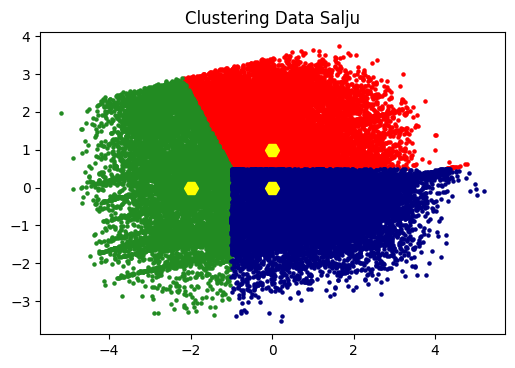

In [ ]:
#visualisasi K Means 
fig, ax = plt.subplots()
warna = ['red', 'forestgreen', 'navy', 'gold', 'violet', 'turquoise', 'grey']

#visualisasi tiap iterasi K nya
for i in range(k):
        titik = np.array([arr[j] for j in range(len(arr)) if arrclus[j] == i])
        x = titik[:, 0]
        y = titik[:, 1]
        ax.scatter(x, y, s=5, c=warna[i])

#visualisasi centroid
x_clus = centroid[:, 0]
y_clus = centroid[:, 1]        
ax.scatter(x_clus, y_clus, marker='H', s=100, color='yellow')
plt.title("Clustering Data Salju")
plt.show

In [ ]:
#menunjukan bahwa centroid telah berubah dari nilai asal
print(centroid)

[[ 0  1]
 [-2  0]
 [ 0  0]]


**Export Data**
> Export data hasil clustering dengan format csv dengan menambah kolom cluster

In [ ]:
df_br["Cluster"] = arrclus
df_br

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,Cluster
2,1.018825,1.217570,-0.362904,-0.483745,0.455387,1.130372,1.0
6,-0.624402,-0.816859,0.416228,1.096181,-2.013777,-0.677960,0.0
14,-0.812199,-1.076898,-0.362904,-0.483745,0.455387,-1.030024,2.0
15,-0.374006,-0.725080,-0.362904,-0.935152,0.792091,-0.661957,2.0
16,-0.154909,0.009150,0.416228,-0.483745,0.455387,0.170196,2.0
...,...,...,...,...,...,...,...
109087,-1.031296,-0.097925,-0.362904,-0.483745,-2.013777,-0.005836,0.0
109089,1.097074,-0.021443,-0.362904,-0.483745,-2.013777,-0.021839,0.0
109090,1.316171,-0.052036,-0.362904,0.494304,1.493558,-0.069848,2.0
109091,0.627580,0.177411,-0.362904,-0.483745,0.455387,0.298219,2.0


In [ ]:
df_br.to_csv("drive/My Drive/TubesMalin/salju_cluster.csv") 

# Evaluasi

**Elbow Method**
> Evaluasi menggunakan Elbow Method, ini dilakukan untuk mengkomparasi dari clustering sebelumnya

In [ ]:
#dataset yang digunakan
df

,x,y
0,-1.754703,-1.078530
1,0.753174,2.397362
2,1.742130,-0.171045
3,1.244469,-0.871032
4,0.187231,-0.680066
...,...,...
59054,0.413417,1.366919
59055,-0.700708,0.990344
59056,-0.579595,-0.918158
59057,-0.476531,-0.760026


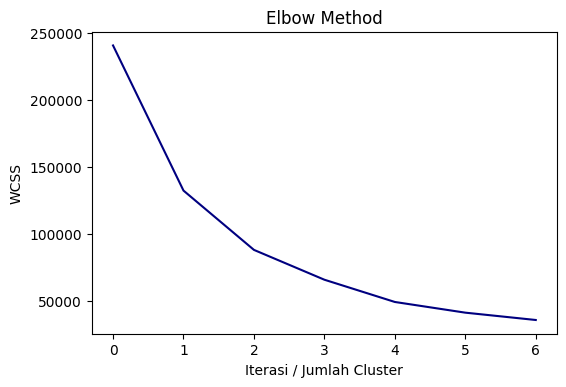

In [ ]:
#membuat array wcss
wcss=[]
#looping membuat kmeans lalu dimasukan kedalam array
for n in range(1,8):
    km = KMeans(n_clusters= n, init='k-means++', random_state=50)
    km.fit(df)
    wcss.append(km.inertia_)
#visualisasi data
plt.plot(wcss,color= 'navy')
plt.title('Elbow Method')
plt.xlabel('Iterasi / Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Eksperimen

Pada Tahap Eksperimen ini saya mengubah beberapa hal yaitu:



Eksplorasi dan persiapan Data
*   Menambah kolom tabel BersaljuBesok
*   Menghilangkan option menghilangkan 2 angka dibelakang koma

Pemodelan / Clustering
*   nilai k dirubah menjadi 2





## Eksplorasi dan Persiapan Data

### Eksplorasi Data

Untuk data Salju ini saya menggunakan 6 kolom yang saya anggap cukup penting untuk mengukur apakah besok bersalju atau tidak

In [ ]:
df_salju2 = pd.read_csv('drive/My Drive/TubesMalin/salju_train.csv')
df_salju2 = df_salju2[['SuhuMin','SuhuMax','Hujan','SinarMatahari','Awan3pm','Suhu3pm','BersaljuBesok']]
df_salju2

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
0,10.4,15.5,4.8,NaN,NaN,15.0,Tidak
1,9.0,17.0,8.0,7.4,5.0,15.5,Ya
2,18.2,32.0,0.0,NaN,NaN,29.6,Tidak
3,7.3,24.5,0.0,10.4,7.0,23.2,Tidak
4,5.9,20.3,0.0,12.6,6.0,18.1,Tidak
...,...,...,...,...,...,...,...
109090,20.1,23.7,0.0,8.9,6.0,22.1,Ya
109091,15.7,25.2,0.0,NaN,NaN,24.4,Ya
109092,7.5,20.4,1.6,NaN,NaN,19.8,Tidak
109093,10.8,29.8,0.0,11.2,1.0,29.2,Tidak


### Persiapan/Pre-Processing Data

**Missing Value**
> Mengisi Missing Value dari data yang ada dengan mean dan median, mean digunakan ketika skewness dari data tidak terlalu besar atau ada di range -1 hingga 1, sedangkan median digunakan ketika skewness besar



In [ ]:
#membuat data bersaljubesok menjadi numerik dengan ketentuan tidak :0 dan ya:1
df_salju2['BersaljuBesok'] = df_salju2['BersaljuBesok'].replace({'Tidak': 0, 'Ya': 1})

In [ ]:
df_salju2.isnull().sum()

SuhuMin           1122
SuhuMax            929
Hujan             2431
SinarMatahari    52379
Awan3pm          44471
Suhu3pm           2698
BersaljuBesok     2431
dtype: int64

In [ ]:
df_salju2.skew(axis=0, skipna=True)

SuhuMin           0.018027
SuhuMax           0.220794
Hujan            10.059372
SinarMatahari    -0.493987
Awan3pm          -0.227323
Suhu3pm           0.238056
BersaljuBesok     1.319469
dtype: float64

In [ ]:
#mengganti nilai null dengan mean dan median
df_salju2['SuhuMin'].fillna(df_salju2['SuhuMin'].mean(),inplace=True)
df_salju2['SuhuMax'].fillna(df_salju2['SuhuMax'].mean(),inplace=True)
df_salju2['SinarMatahari'].fillna(df_salju2['SinarMatahari'].mean(),inplace=True)
df_salju2['Awan3pm'].fillna(df_salju2['Awan3pm'].mean(),inplace=True)
df_salju2['Suhu3pm'].fillna(df_salju2['Suhu3pm'].mean(),inplace=True)

df_salju2['BersaljuBesok'].fillna(df_salju2['BersaljuBesok'].median(),inplace=True)
df_salju2['Hujan'].fillna(df_salju2['Hujan'].median(),inplace=True)

#mengecek kembali nilai null data 
df_salju2.isnull().sum()

SuhuMin          0
SuhuMax          0
Hujan            0
SinarMatahari    0
Awan3pm          0
Suhu3pm          0
BersaljuBesok    0
dtype: int64

In [ ]:
df_salju2

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
0,10.4,15.5,4.8,7.599527,4.51614,15.0,0.0
1,9.0,17.0,8.0,7.400000,5.00000,15.5,1.0
2,18.2,32.0,0.0,7.599527,4.51614,29.6,0.0
3,7.3,24.5,0.0,10.400000,7.00000,23.2,0.0
4,5.9,20.3,0.0,12.600000,6.00000,18.1,0.0
...,...,...,...,...,...,...,...
109090,20.1,23.7,0.0,8.900000,6.00000,22.1,1.0
109091,15.7,25.2,0.0,7.599527,4.51614,24.4,1.0
109092,7.5,20.4,1.6,7.599527,4.51614,19.8,0.0
109093,10.8,29.8,0.0,11.200000,1.00000,29.2,0.0


**Outlier**
> Menghapus Outliers atau data yang tidak stabil pada seluruh kolom yang ada, ini bertujuan untuk membuat data lebih bersih dan stabil

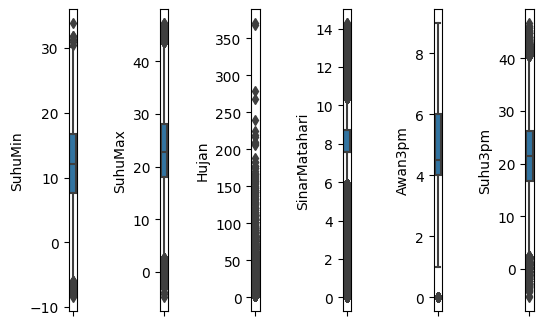

In [ ]:
#mengecek outliers menggunakan boxplot dari seaborn
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 100

sns.boxplot(y=df_salju2["SuhuMin"], ax=a[0])
sns.boxplot(y=df_salju2["SuhuMax"], ax=a[1])
sns.boxplot(y=df_salju2["Hujan"], ax=a[2])
sns.boxplot(y=df_salju2["SinarMatahari"], ax=a[3])
sns.boxplot(y=df_salju2["Awan3pm"], ax=a[4])
sns.boxplot(y=df_salju2["Suhu3pm"], ax=a[5])

plt.subplots_adjust(wspace=10)

In [ ]:
#fungsi untuk menghapus outlier
def out(data, kolom):
    atas = data[kolom].quantile(.75)
    bawah = data[kolom].quantile(.25)
    kuartil = atas-bawah

    batasbawah = bawah - 1.5*kuartil
    batasatas = atas + 1.5*kuartil
    
    res = data.loc[(data[kolom] > batasbawah) & (data[kolom] < batasatas)]

    return res

In [ ]:
#memanggil fungsi out dan dimasukan kembali kedalam dataframe
df_salju2 = out(df_salju2,'Hujan')
df_salju2 = out(df_salju2,'SinarMatahari')
df_salju2 = out(df_salju2,'SuhuMax')
df_salju2 = out(df_salju2,'Suhu3pm')
df_salju2 = out(df_salju2,'SuhuMin')
df_salju2 = out(df_salju2,'Awan3pm')

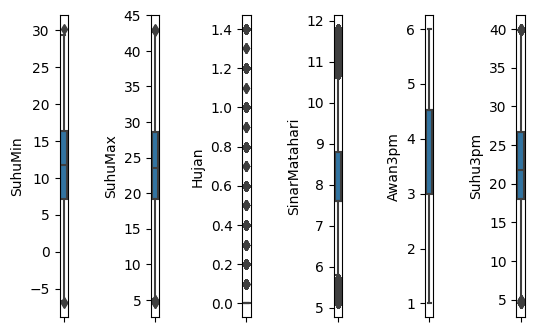

In [ ]:
#mengecek kembali outliers menggunakan boxplot dari seaborn
f, a = plt.subplots(1, 6)
mp.rcParams['figure.dpi'] = 100

sns.boxplot(y=df_salju2["SuhuMin"], ax=a[0])
sns.boxplot(y=df_salju2["SuhuMax"], ax=a[1])
sns.boxplot(y=df_salju2["Hujan"], ax=a[2])
sns.boxplot(y=df_salju2["SinarMatahari"], ax=a[3])
sns.boxplot(y=df_salju2["Awan3pm"], ax=a[4])
sns.boxplot(y=df_salju2["Suhu3pm"], ax=a[5])

plt.subplots_adjust(wspace=10)

In [ ]:
df_salju2

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
2,18.2,32.0,0.0,7.599527,4.51614,29.6,0.0
6,7.7,18.7,0.2,9.700000,1.00000,18.3,0.0
14,6.5,17.0,0.0,7.599527,4.51614,16.1,0.0
15,9.3,19.3,0.0,7.000000,5.00000,18.4,0.0
16,10.7,24.1,0.2,7.599527,4.51614,23.6,0.0
...,...,...,...,...,...,...,...
109087,5.1,23.4,0.0,7.599527,1.00000,22.5,0.0
109089,18.7,23.9,0.0,7.599527,1.00000,22.4,0.0
109090,20.1,23.7,0.0,8.900000,6.00000,22.1,1.0
109091,15.7,25.2,0.0,7.599527,4.51614,24.4,1.0


**Scaling**
> Scaling dengan menggunakan StandardScaler, ini dipilih untuk membuat persebaran data setiap kolomnya tidak terlalu jauh dan angkanya masih bervariasi

In [ ]:
#scale = StandardScaler()
#scale.fit(df_salju2)
temp2 = MinMaxScaler().fit_transform(df_salju2)
df_br2 = pd.DataFrame(temp2, index=df_salju2.index, columns=df_salju2.columns)

In [ ]:
df_br2

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok
2,0.677419,0.712435,0.000000,0.373064,0.703228,0.707042,0.0
6,0.395161,0.367876,0.142857,0.686567,0.000000,0.388732,0.0
14,0.362903,0.323834,0.000000,0.373064,0.703228,0.326761,0.0
15,0.438172,0.383420,0.000000,0.283582,0.800000,0.391549,0.0
16,0.475806,0.507772,0.142857,0.373064,0.703228,0.538028,0.0
...,...,...,...,...,...,...,...
109087,0.325269,0.489637,0.000000,0.373064,0.000000,0.507042,0.0
109089,0.690860,0.502591,0.000000,0.373064,0.000000,0.504225,0.0
109090,0.728495,0.497409,0.000000,0.567164,1.000000,0.495775,1.0
109091,0.610215,0.536269,0.000000,0.373064,0.703228,0.560563,1.0


**Feature Selection**
> Melakukan Feature Selection dengan menggunakan PCA, ini berfungsi untuk mereduksi data menjadi 2 kolom untuk selanjutnya digunakan dalam clustering

In [ ]:
#memanggil PCA dan dimasukan kedalam dataframe agar data dapat terlihat jelas
pca = PCA(n_components=2)
df2 = pca.fit_transform(df_br2)
df2 = pd.DataFrame(data = df2, columns = ['x', 'y'])
df2

,x,y
0,-0.092497,-0.001172
1,-0.360506,0.227455
2,0.043251,-0.314756
3,0.086843,-0.340909
4,-0.008464,-0.172889
...,...,...
59054,-0.325390,0.184828
59055,-0.350706,0.294870
59056,0.867771,0.334888
59057,0.775620,0.443886


In [ ]:
#memasukan dataframe kedalam array untuk proses clustering
arr2 = MinMaxScaler(feature_range=(0,10)).fit_transform(df2)
print(arr2)

[[2.94177964 3.45582468]
 [1.49407222 4.54445413]
 [3.67505726 1.96266157]
 ...
 [8.12888667 5.05600514]
 [7.63110799 5.57500886]
 [0.58464294 5.82906156]]


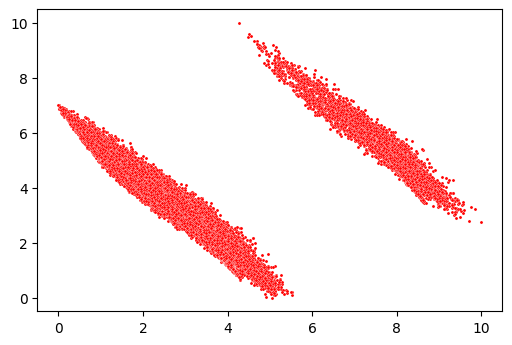

In [ ]:
#plot hasil PCA dengan scatterplot
x=arr2[:,0]
y=arr2[:,1]
sns.scatterplot(x, y, s=5, color='red')

## Pemodelan / Clustering

**Euclidian Distance**
> Membuat fungsi untuk menghitung jarak berdasarkan rumus Euclidian

In [ ]:
def euc(a, b, ax=1):
    kurang = a-b
    hasil = np.linalg.norm(kurang, axis=ax)
    return hasil

**Mencari Centroid**
> Mengenerate centroid secara random dengan nilai minimun dan maximun yang terdapat pada array yang menampung data salju

In [ ]:
k = 2
min = np.min(arr2)
max = np.max(arr2)

centro1 = np.random.randint(min, max, size=k)
centro2 = np.random.randint(min, max, size=k)
centroid = np.array(list(zip(centro1, centro2)))
print(centroid)

[[7 7]
 [1 7]]


**K Means**
> Melakukan Clustering dengan K Means 

In [ ]:
#membuat arrclus untuk menampung hasil cluster dan arrC untuk menampung nilai centroid sebelumnya lalu array titik untuk menapung pengelompokan
arrclus = np.zeros(len(arr2))
arrC = np.zeros(centroid.shape)
titik = []
temp = []
#menghitung jarak awal untuk stop parameter
stop = euc(centroid, arrC, None)
print(stop)

while stop != 0:
#for i in range(20):
    #looping sebanyak data untuk menhitung jarak minimun dari tiap titik yang ada lalu dimasukan ke arrayclus
    for i in range(len(arr2)):
        jarak = euc(arr2[i], centroid) 
        cluster = np.argmin(jarak) 
        arrclus[i] = cluster 
    #mencopy nilai centroid sebelumnya
    arrC = deepcopy(centroid) 

    #looping untuk mengelompokan titik yang daerahnya berdekatan lalu mengubah nilai centroidnya
    for i in range(k): 
        titik = [arr2[j] for j in range(len(arr2)) if arrclus[j] == i] 
        centroid[i] = np.mean(titik, axis=0) 
        temp.append(arrclus)

    #menghitung ulang jarak untuk stop parameter
    stop = euc(centroid, arrC, None)
    
    print(stop)



12.165525060596439
5.196152422706632
1.4142135623730951
0.0


<function matplotlib.pyplot.show>

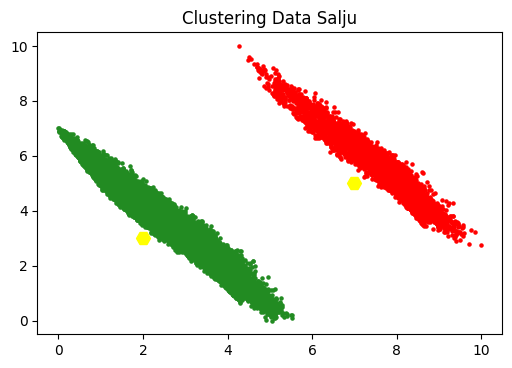

In [ ]:
#visualisasi K Means 
fig, ax = plt.subplots()
warna = ['red', 'forestgreen', 'navy', 'gold', 'violet', 'turquoise', 'grey']

#visualisasi tiap iterasi K nya
for i in range(k):
        titik = np.array([arr2[j] for j in range(len(arr2)) if arrclus[j] == i])
        x = titik[:, 0]
        y = titik[:, 1]
        ax.scatter(x, y, s=5, c=warna[i])

#visualisasi centroid
x_clus = centroid[:, 0]
y_clus = centroid[:, 1]        
ax.scatter(x_clus, y_clus, marker='H', s=100, color='yellow')
plt.title("Clustering Data Salju")
plt.show

In [ ]:
#menunjukan bahwa centroid telah berubah dari nilai asal
print(centroid)

[[7 5]
 [2 3]]


**Export Data**
> Export data hasil clustering dengan format csv dengan menambah kolom cluster

In [ ]:
df_br2["Cluster"] = arrclus
df_br2

,SuhuMin,SuhuMax,Hujan,SinarMatahari,Awan3pm,Suhu3pm,BersaljuBesok,Cluster
2,0.677419,0.712435,0.000000,0.373064,0.703228,0.707042,0.0,1.0
6,0.395161,0.367876,0.142857,0.686567,0.000000,0.388732,0.0,1.0
14,0.362903,0.323834,0.000000,0.373064,0.703228,0.326761,0.0,1.0
15,0.438172,0.383420,0.000000,0.283582,0.800000,0.391549,0.0,1.0
16,0.475806,0.507772,0.142857,0.373064,0.703228,0.538028,0.0,1.0
...,...,...,...,...,...,...,...,...
109087,0.325269,0.489637,0.000000,0.373064,0.000000,0.507042,0.0,1.0
109089,0.690860,0.502591,0.000000,0.373064,0.000000,0.504225,0.0,1.0
109090,0.728495,0.497409,0.000000,0.567164,1.000000,0.495775,1.0,0.0
109091,0.610215,0.536269,0.000000,0.373064,0.703228,0.560563,1.0,0.0


## Evaluasi

**Elbow Method**
> Evaluasi menggunakan Elbow Method, ini dilakukan untuk mengkomparasi dari clustering sebelumnya

In [ ]:
#dataset yang digunakan
df2

,x,y
0,-0.092497,-0.001172
1,-0.360506,0.227455
2,0.043251,-0.314756
3,0.086843,-0.340909
4,-0.008464,-0.172889
...,...,...
59054,-0.325390,0.184828
59055,-0.350706,0.294870
59056,0.867771,0.334888
59057,0.775620,0.443886


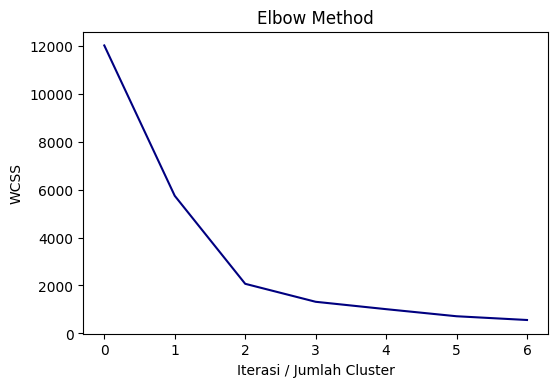

In [ ]:
#membuat array wcss
wcss=[]
#looping membuat kmeans lalu dimasukan kedalam array
for n in range(1,8):
    km = KMeans(n_clusters= n, init='k-means++', random_state=50)
    km.fit(df2)
    wcss.append(km.inertia_)
#visualisasi data
plt.plot(wcss,color= 'navy')
plt.title('Elbow Method')
plt.xlabel('Iterasi / Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()